<a href="https://colab.research.google.com/github/agistaputri/LinearRegressionSalary/blob/main/Linear_Regression_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np

In [25]:
class Linear_Regression():

    # initiating the parameters (learning rate and number of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        # initiating number of training examples and number if features
        self.m, self.n = X.shape #number of rows and columns

        # initiating the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()


    def update_weights(self):
        Y_predictions = self.predict(self.X)

        # calculate gradient
        dw = - (2 * (self.X.T).dot(self.Y - Y_predictions)) / self.m
        db = - 2 * np.sum(self.Y - Y_predictions)/self.m

        # updating the weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db


    def predict(self, X):

        # Y = mX + c
        return X.dot(self.w) + self.b

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Data pre-processing**

In [4]:
data = pd.read_csv('/content/salary_data.csv')

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
data.shape

(30, 2)

In [8]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

**Splitting the features and targets**

In [9]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


**Splitting dataset into train and test data**

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.33, random_state= 2)

**Training linear regression model**

In [26]:
model = Linear_Regression(learning_rate= 0.02, no_of_iterations= 1000)

In [27]:
model.fit(X_train, Y_train)

In [28]:
# print the parameters value

print ("Weights: ", model.w[0])
print ("Bias: ", model.b)

Weights:  9514.400999035135
Bias:  23697.406507136307


**Predict the test data**

In [29]:
test_data_predictions = model.predict(X_test)

In [30]:
print(test_data_predictions)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


**Visualizing the predicted and actual values**

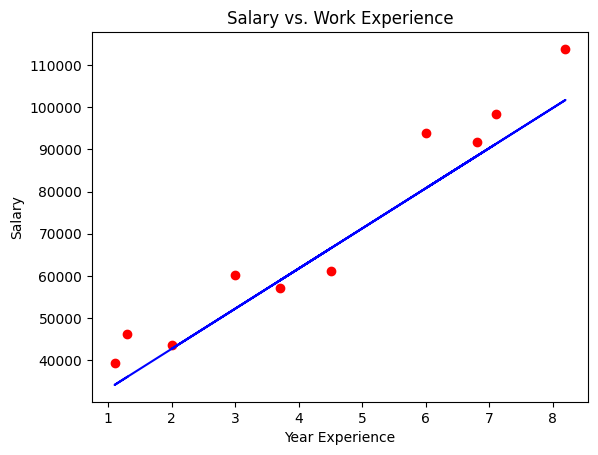

In [31]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, test_data_predictions, color = 'blue')
plt.xlabel("Year Experience")
plt.ylabel("Salary")
plt.title("Salary vs. Work Experience")
plt.show()